<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf 


from tensorflow import keras
from keras import Sequential

In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import pathlib 

In [ ]:
data_dir = '/content/drive/MyDrive/Data 2' 
data_dir = pathlib.Path(data_dir) 

In [ ]:
data_dir

PosixPath('/content/drive/MyDrive/Data 2')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 6.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Tat/IFIT3 Tat2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Tat/IFIT3 Tat1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Tat/IFIT3 Tat3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/T

In [ ]:
len(list(data_dir.glob('*/*.jpg')))

18

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

18

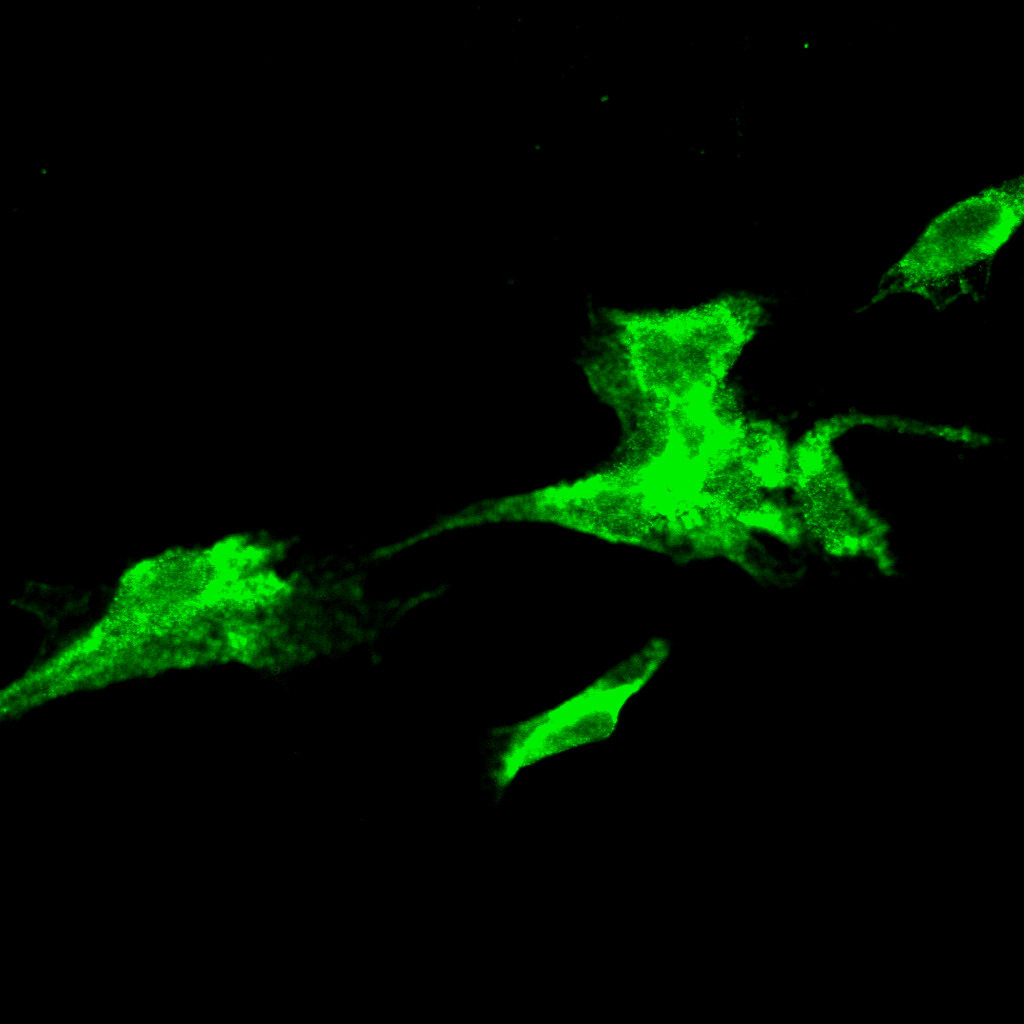

In [ ]:
Tat = list(data_dir.glob('Tat/*'))
Tat
PIL.Image.open(str(Tat[1]))

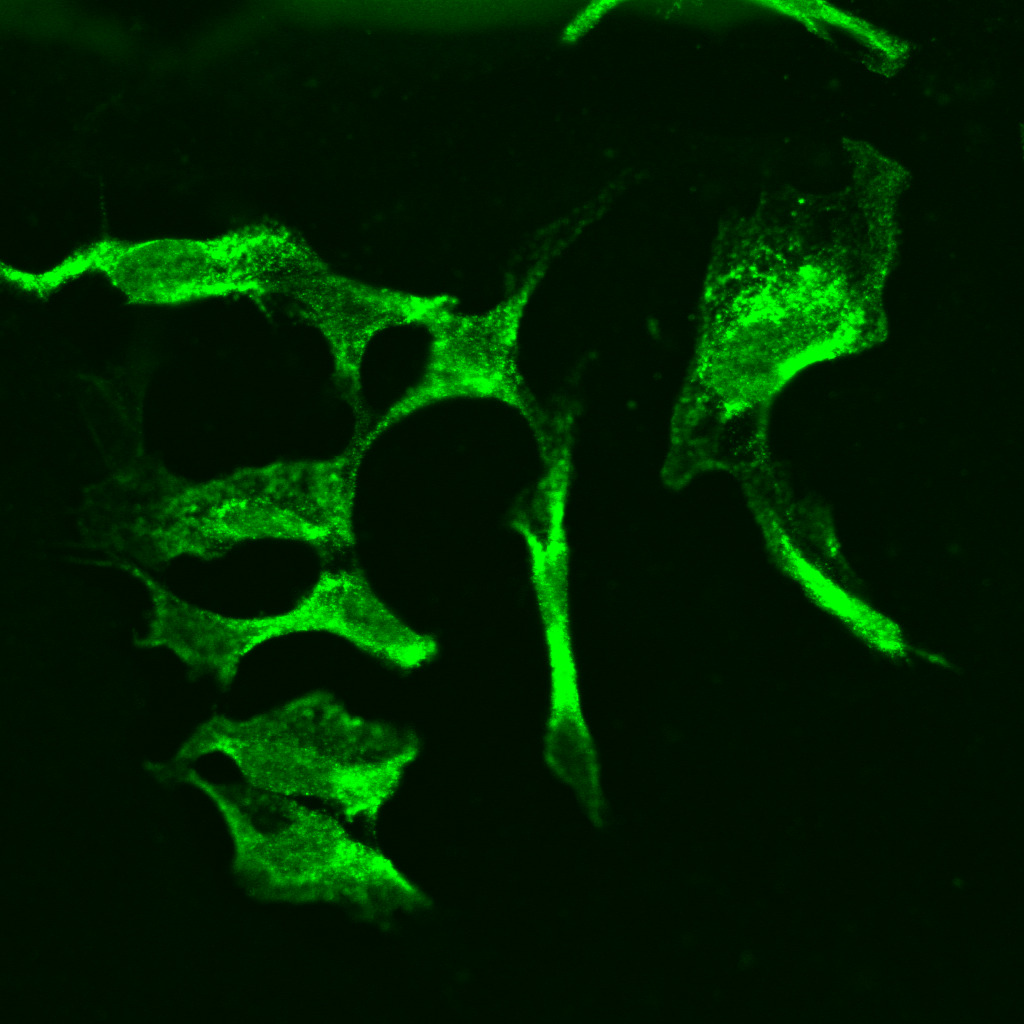

In [ ]:
TatcART = list(data_dir.glob('TatcART/*'))
PIL.Image.open(str(TatcART[1]))

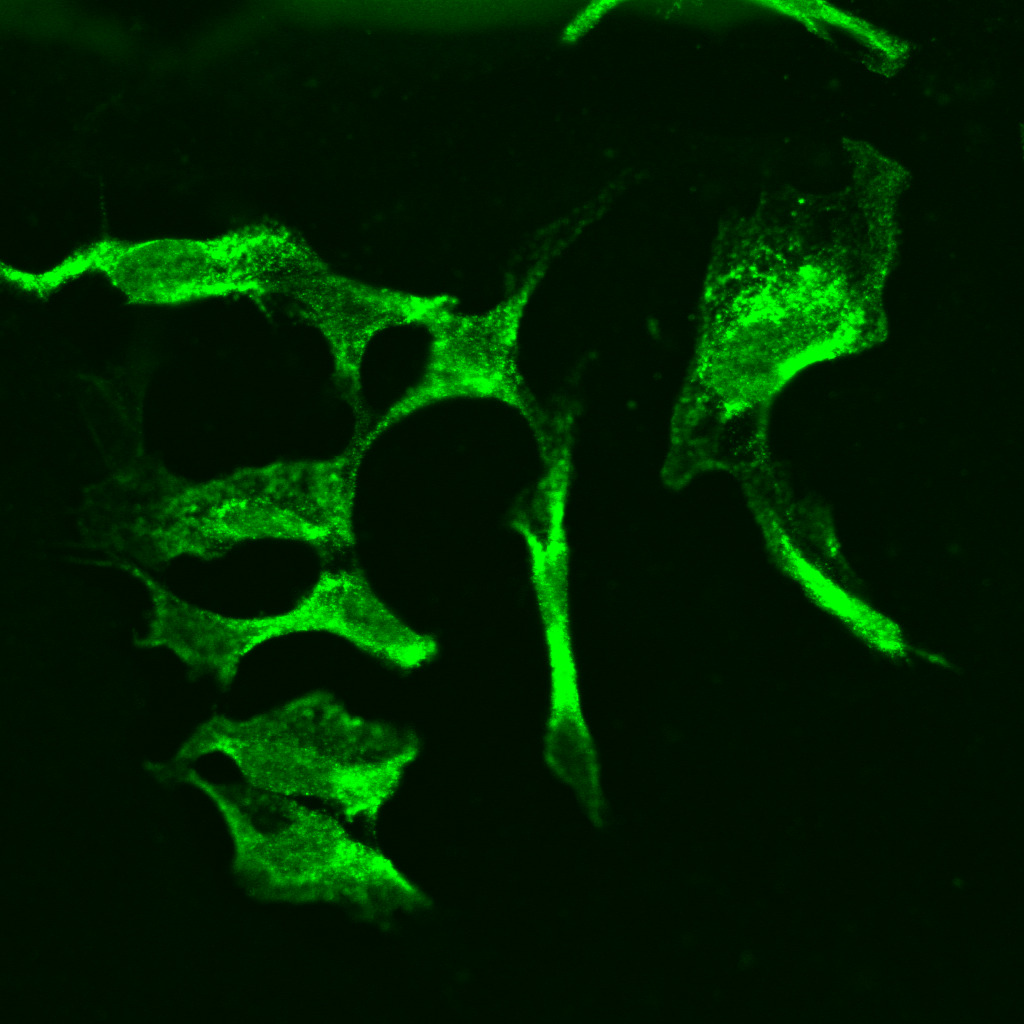

In [ ]:
cART = list(data_dir.glob('cART/*'))
cART
PIL.Image.open(str(cART[1]))

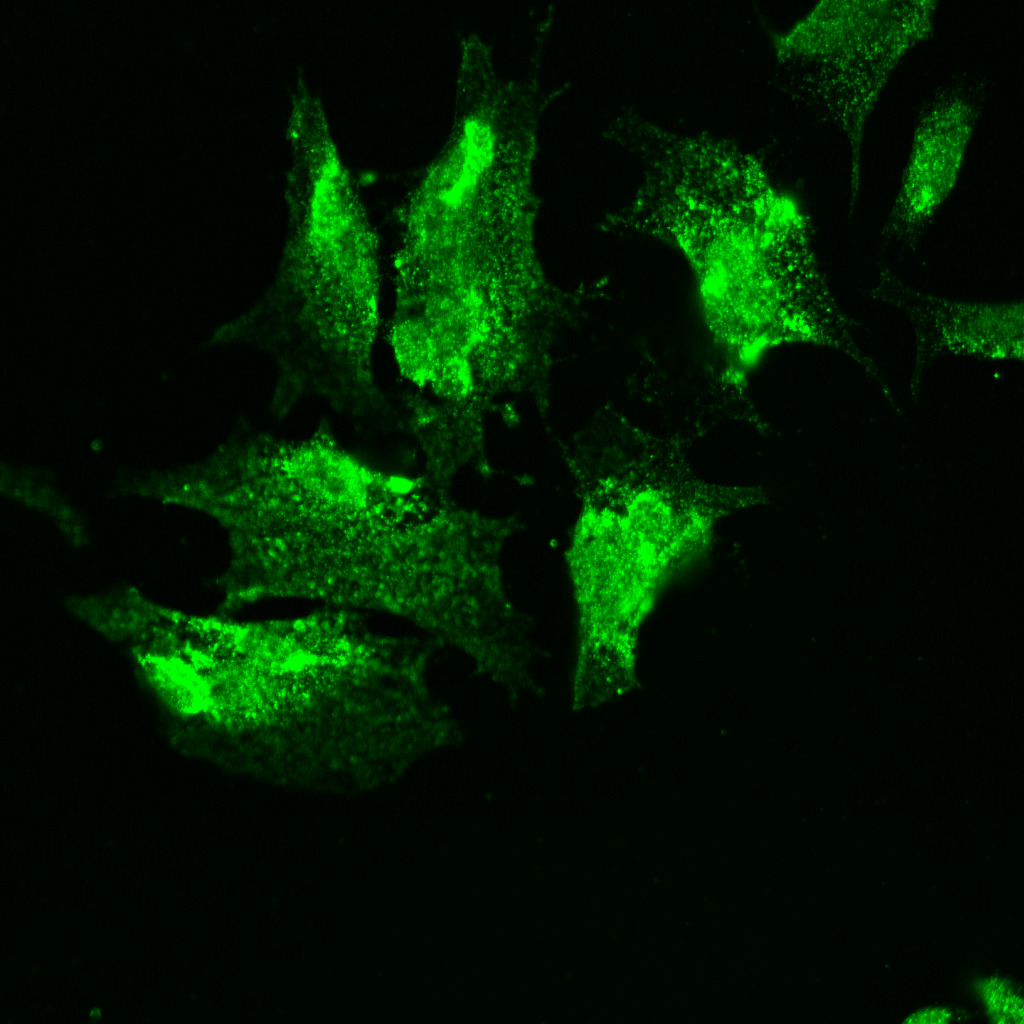

In [ ]:
Control = list(data_dir.glob('Control/*'))
PIL.Image.open(str(Control[1]))

In [ ]:
gen_images_dict = {
    'cART': list(data_dir.glob('cART/*')),
    'TatcART': list(data_dir.glob('TatcART/*')),
    'Control': list(data_dir.glob('Control/*')),
    'Tat': list(data_dir.glob('Tat/*')),
}

In [ ]:
gen_images_dict['cART']

[PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 6.jpg')]

In [ ]:
gen_labels_dict = {
    'cART': 0,
    'TatcART': 1,
    'Control': 2,
    'Tat': 3,
}

In [ ]:
gen_images_dict['cART'][0]

PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg')

In [ ]:
img = cv2.imread(str(gen_images_dict['cART'][0]))
img.shape

(1024, 1024, 3)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
    validation_split=0.1, 
    subset="training",  
    seed=123, image_size=(180, 180), 
    batch_size=128) 
#
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
     validation_split=0.1, 
     subset="validation", 
     seed=123, 
     image_size=(180, 180), 
     batch_size=128) 
 
class_names = train_ds.class_names
print(class_names)

Found 18 files belonging to 4 classes.
Using 17 files for training.
Found 18 files belonging to 4 classes.
Using 1 files for validation.
['Control', 'Tat', 'TatcART', 'cART']


In [ ]:
model = tf.keras. Sequential([ 
    layers.experimental.preprocessing. Rescaling(1./255), 
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    #layers.Dropout (0.2),

  
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Dropout(0.1),
 
    layers.Flatten (), layers. Dense(128, activation='relu'), 
    layers.Dense (64, activation='relu'), 
    layers.Dense(16, activation='relu'),

    layers.Dense(4) # number of classes
    ]) 

In [ ]:
model.compile (optimizer='adam', loss=tf.losses. SparseCategoricalCrossentropy (from_logits=True), metrics=['accuracy'])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.3810 - accuracy: 0.3529 - val_loss: 1.1697 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 874ms/step - loss: 1.2094 - accuracy: 0.6471 - val_loss: 1.0430 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 1s 866ms/step - loss: 0.8662 - accuracy: 0.7059 - val_loss: 1.0285 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.6264 - accuracy: 0.7647 - val_loss: 1.2557 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.4627 - accuracy: 0.7647 - val_loss: 1.5788 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 1s 983ms/step - loss: 0.3609 - accuracy: 0.8235 - val_loss: 1.7559 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 1s 877ms/step - loss: 0.3048 - accuracy: 0.8235 - val_loss: 1.9729 - val_accuracy: 0.0000e+0

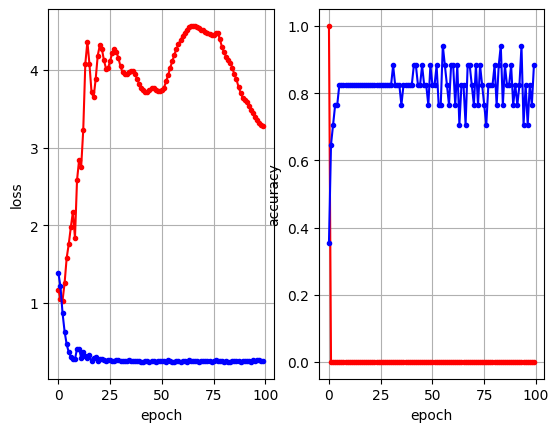

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=100) 
y_vloss = history.history['val_loss'] 
y_loss = history.history['loss'] 
y_acc = history.history['accuracy'] 
y_vacc = history.history['val_accuracy'] 

fig, (ax1, ax2) = plt.subplots (1, 2) 
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red') 
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue') 
ax1.grid() 
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red') 
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue') 
ax2.grid() 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy') 

plt.show()

In [ ]:
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

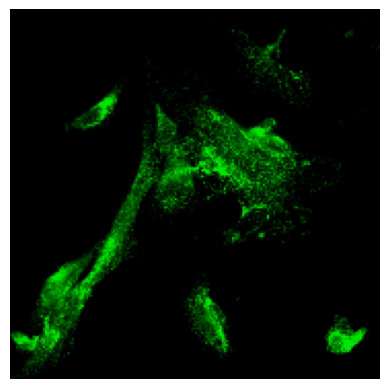

In [ ]:
plt.axis('off')
plt.imshow(X[5])

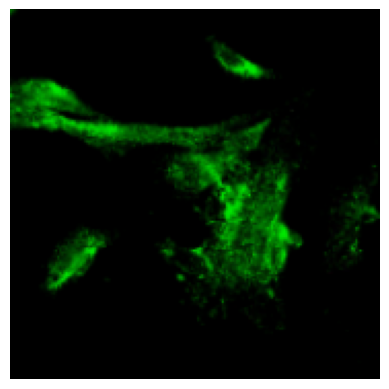

In [ ]:
plt.axis('off')
plt.imshow(data_argumentation(X)[5].numpy().astype("uint8"))

In [ ]:
model = tf.keras. Sequential([ 
    data_argumentation,
    layers.experimental.preprocessing. Rescaling(1./255), 
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    #layers.Dropout (0.2),

  
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Dropout(0.1),
 
    layers.Flatten (), layers. Dense(128, activation='relu'), 
    layers.Dense (64, activation='relu'), 
    layers.Dense(16, activation='relu'),

    layers.Dense(4) # number of classes
    ]) 

In [ ]:
model.compile (optimizer='adam', loss=tf.losses. SparseCategoricalCrossentropy (from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=100) 

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.3821 - accuracy: 0.2353 - val_loss: 1.1019 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 910ms/step - loss: 1.3745 - accuracy: 0.2353 - val_loss: 1.0747 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 1s 919ms/step - loss: 1.3443 - accuracy: 0.3529 - val_loss: 1.1300 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.3198 - accuracy: 0.3529 - val_loss: 0.9727 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 926ms/step - loss: 1.2670 - accuracy: 0.3529 - val_loss: 0.8479 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 1s 969ms/step - loss: 1.2225 - accuracy: 0.3529 - val_loss: 0.9352 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 1s 972ms/step - loss: 1.2010 - accuracy: 0.5294 - val_loss: 1.2214 - val_accuracy: 0.0000e+00
Epoch 8

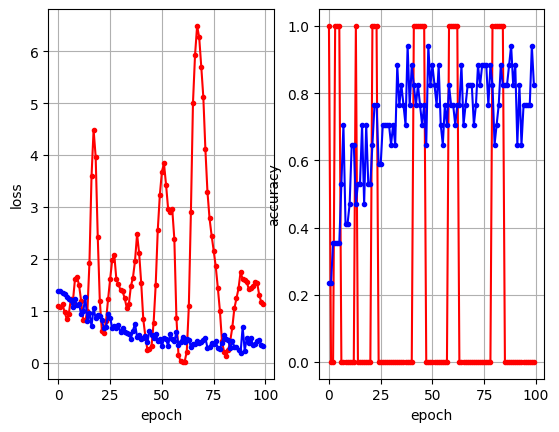

In [ ]:
y_vloss = history.history['val_loss'] 
y_loss = history.history['loss'] 
y_acc = history.history['accuracy'] 
y_vacc = history.history['val_accuracy'] 

fig, (ax1, ax2) = plt.subplots (1, 2) 
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red') 
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue') 
ax1.grid() 
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red') 
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue') 
ax2.grid() 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy') 

plt.show()